# Prelude

In [1]:
from importlib import reload as re

In [2]:
import landau as ld
import landau.interpolate as ldi
import landau.calculate as ldc

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

# Toy Example

In [7]:
l1 = ld.TemperatureDependentLinePhase(
    'l0', 
    fixed_concentration=0,   
    temperatures=[1, 750, 1000], 
    free_energies=[2   , 1.80, 1.00], 
    interpolator=ldi.PolyFit(3)
)
l2 = ld.TemperatureDependentLinePhase(
    'l1', 
    fixed_concentration=1,   
    temperatures=[1, 750, 1000], 
    free_energies=[3   , 2.80, 2.00], 
    interpolator=ldi.PolyFit(3)
)
l3 = ld.TemperatureDependentLinePhase(
    'l2', 
    fixed_concentration=0.5, 
    temperatures=[1, 750, 1000], 
    free_energies=[2.45, 2.00, 1.42], 
    interpolator=ldi.PolyFit(3)
)
liq = ld.IdealSolution('liquid', l1, l2)
rliq = ld.RegularSolution('liquid', [l1, l3, l2])

In [8]:
s1 = ld.TemperatureDependentLinePhase(
    's0', 
    fixed_concentration=0,   
    temperatures=[1, 750, 1000], 
    free_energies=[1.9, 1.6, 1.2], 
    interpolator=ldi.SGTE(2)
)
s2 = ld.TemperatureDependentLinePhase(
    's1', 
    fixed_concentration=1,   
    temperatures=[1, 750, 1000], 
    free_energies=[2.9, 2.6, 2.2], interpolator=ldi.SGTE(2)
)
s3 = ld.TemperatureDependentLinePhase(
    's3', 
    fixed_concentration=0.4, 
    temperatures=[1, 750, 1000], 
    free_energies=np.array([2.4, 1.85, 1.45])-.05, 
    interpolator=ldi.SGTE(3)
)
sol = ld.IdealSolution('solid', s1, s2)

In [9]:
Ts = np.linspace(50, 1000, 100)

/home/ponder/science/phd/dev/landau/landau/interpolate.py:59: OptimizeWarning: Covariance of the parameters could not be estimated
  parameters, *_ = so.curve_fit(G_calphad, x, y, p0=[0]*self.nparam)


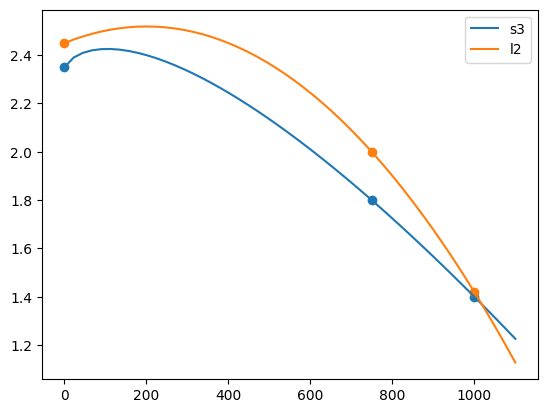

In [10]:
s3.check_interpolation()
l3.check_interpolation()
plt.legend()

In [11]:
c = np.linspace(0, 1, 200)[1:-1]
mu = 1 + ld.phases.kB * 2000 * np.log(c/(1-c))

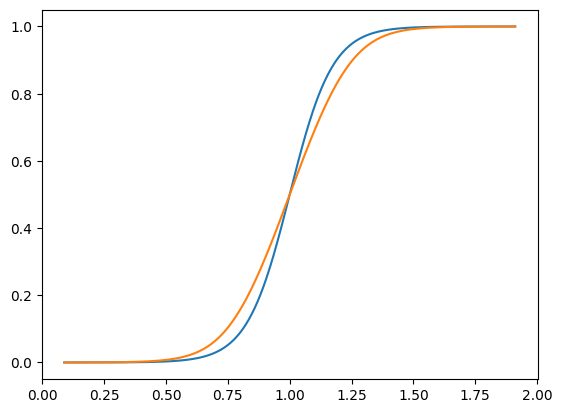

In [12]:
plt.plot(mu, liq.concentration(1000, mu))
plt.plot(mu, rliq.concentration(1000, mu))

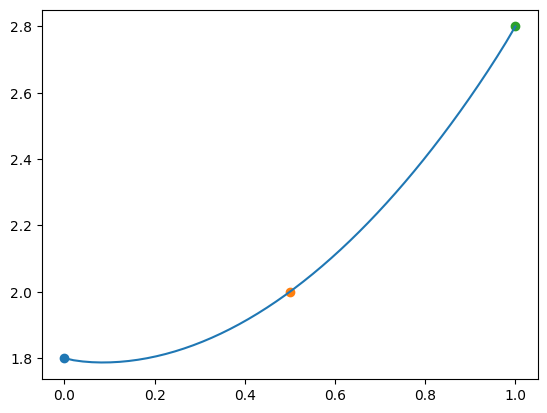

In [13]:
rliq.check_interpolation(750)

In [14]:
# df = ppdt.calc_phase_diagram([liq, s1, s2], np.linspace(50, 1000), mu, refine=True)

In [15]:
from importlib import reload as re
re(ld.phases)
re(ld)

<module 'landau' from '/home/ponder/science/phd/dev/landau/landau/__init__.py'>

In [16]:
df = ldc.calc_phase_diagram([rliq, sol, s3], np.linspace(500, 1000, 50), mu, refine=True)

<Axes: xlabel='c', ylabel='T'>

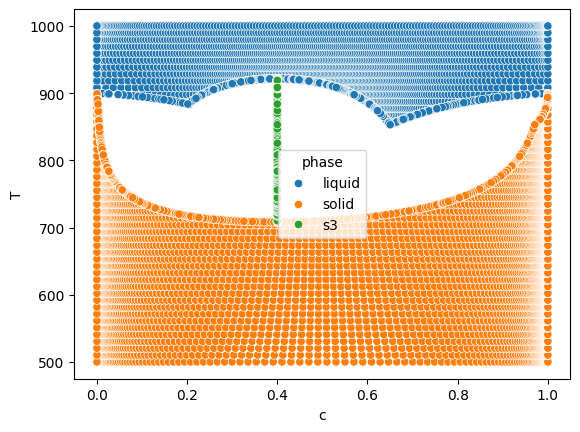

In [17]:
sns.scatterplot(
    data=df.query('stable'),
    x='c', y='T',
    hue='phase'
)

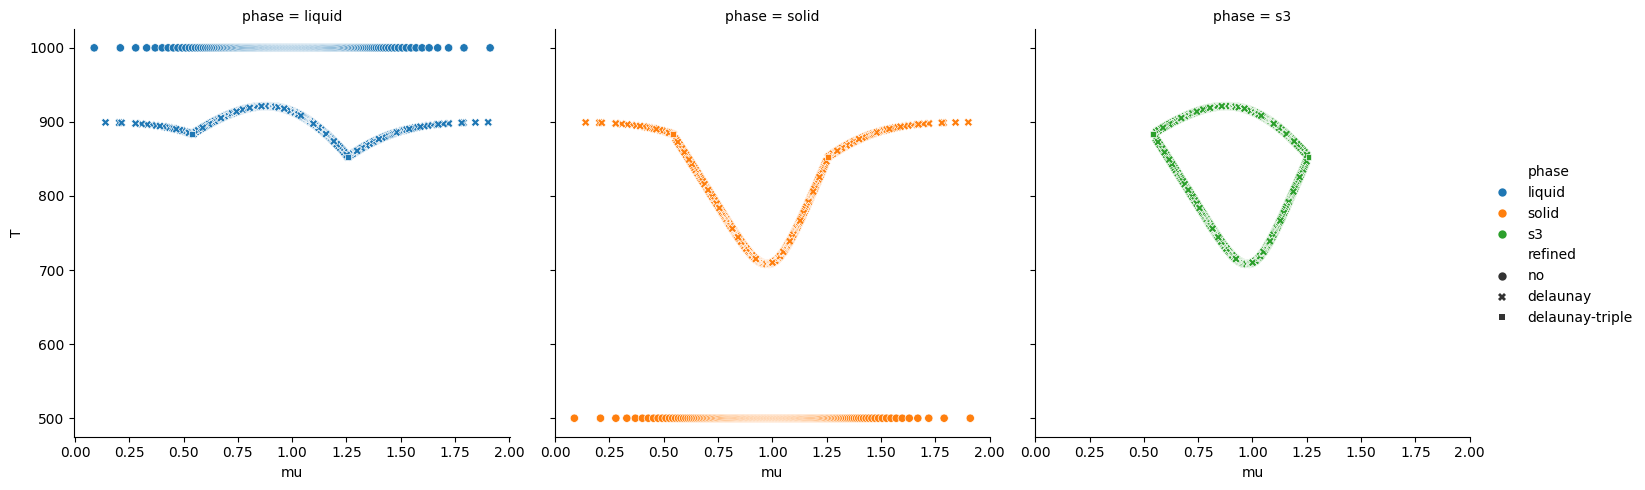

In [18]:
sns.relplot(
    data=df.query('border'),
    x='mu', y='T',
    hue='phase',
    col='phase',
    style='refined',
)

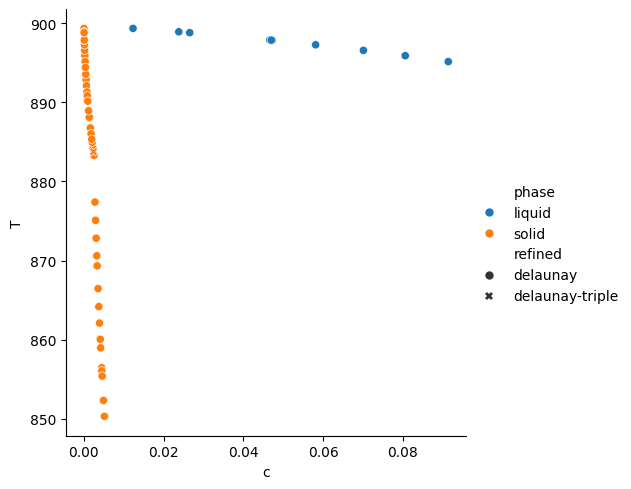

In [19]:
sns.relplot(
    data=df.query('border and 850<T<920 and c<.1'),
    x='c', y='T',
    hue='phase',
    # col='phase',
    style='refined',
)

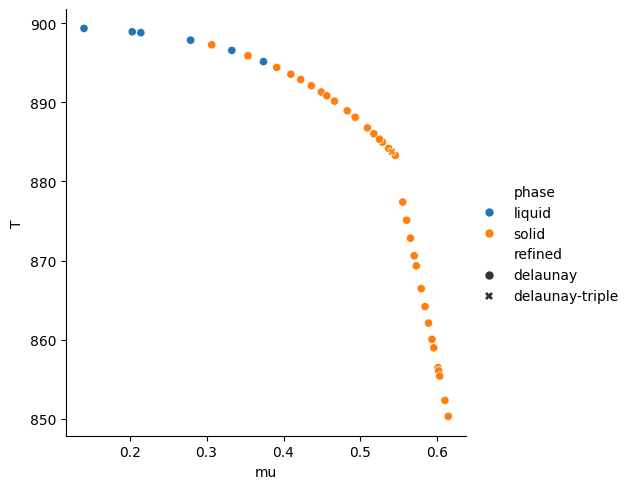

In [20]:
sns.relplot(
    data=df.query('border and 850<T<920 and c<.1'),
    x='mu', y='T',
    hue='phase',
    # col='phase',
    style='refined',
)

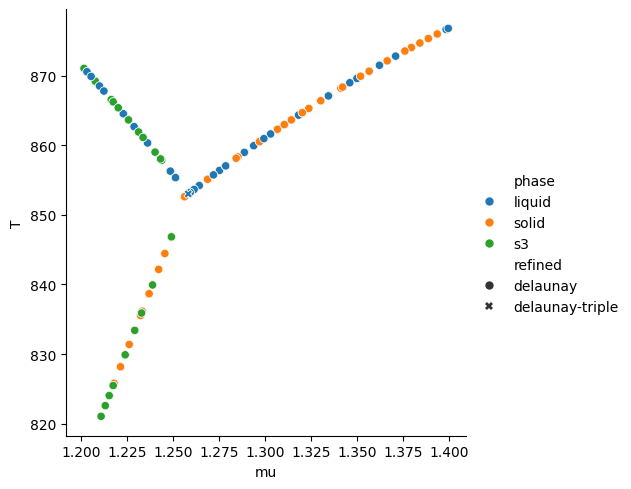

In [21]:
sns.relplot(
    data=df.query('border and 820<T<880 and 1.2<mu<1.4'),
    x='mu', y='T',
    hue='phase',
    # col='phase',
    style='refined',
)

/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


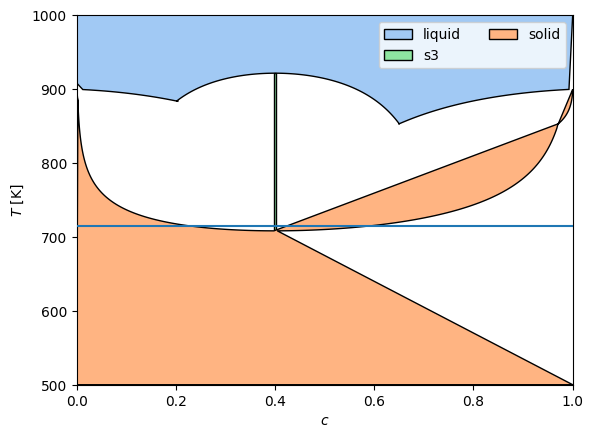

In [22]:
ld.plot_phase_diagram(df)
plt.axhline(714.285714, zorder=10)
# plt.ylim(750, 1000)

In [23]:
p = ld.InterpolatingPhase(
    'test', 
    [
        ld.LinePhase('s0', 0.65, 2.50, .00005),
        ld.LinePhase('s0', 0.75, 2.40, .00010),
        ld.LinePhase('s0', 0.85, 2.50, .00005),
    ], 
    num_coeffs=3,
    num_samples=250,
)

(1.8, 3.0)

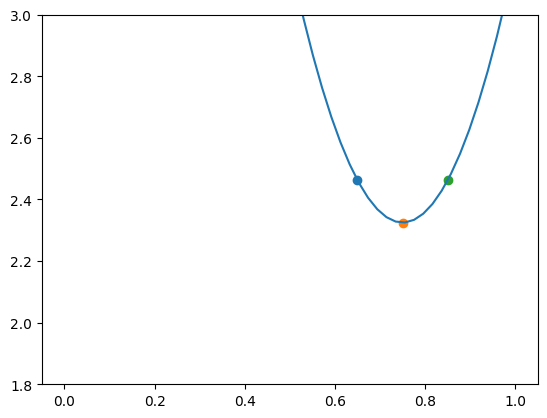

In [24]:
p.check_interpolation(750)
plt.ylim(1.8, 3)

In [25]:
c = np.linspace(0, 1, 200)[1:-1]
mu = 1 + ld.phases.kB * 2500 * np.log(c/(1-c))

In [26]:
%%time
df = ldc.calc_phase_diagram([rliq, sol, p, s3], np.linspace(250, 1000, 100), mu, refine=True)

CPU times: user 14.1 s, sys: 93.2 ms, total: 14.2 s
Wall time: 14.3 s


<Axes: xlabel='c', ylabel='T'>

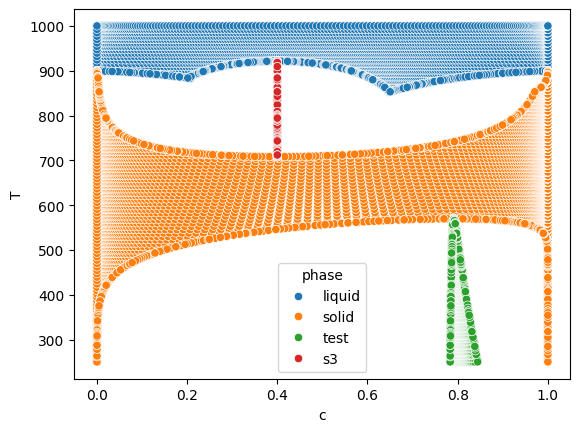

In [27]:
sns.scatterplot(
    data=df.query('stable'),
    x='c', y='T',
    hue='phase'
)

<Axes: xlabel='c', ylabel='T'>

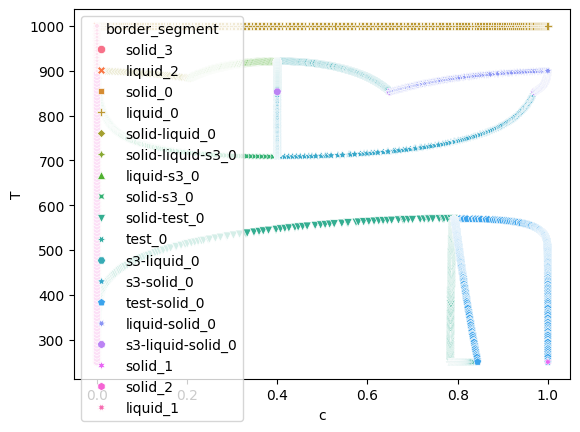

In [33]:
sns.scatterplot(
    data=ldc.get_transitions(df.query('stable')),
    x='c', y='T',
    hue='border_segment',
    style='border_segment'
)

In [29]:
re(ld.phases)
re(ld)

<module 'landau' from '/home/ponder/science/phd/dev/landau/landau/__init__.py'>

/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_va

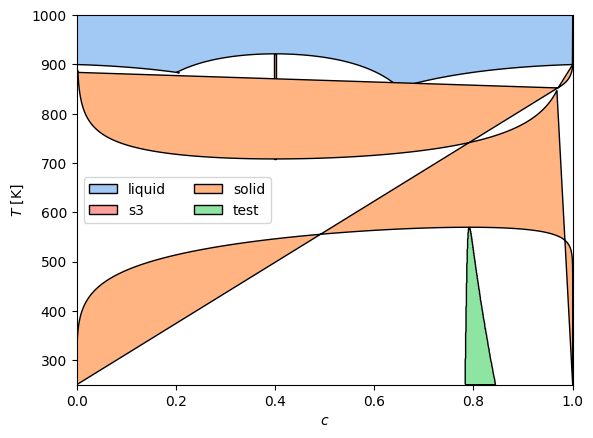

In [32]:
ld.plot_phase_diagram(df)
# plt.ylim(750, 1000)

/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_va

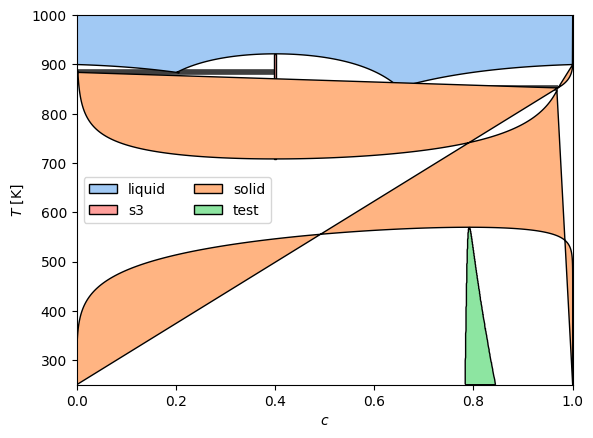

In [31]:
ld.plot_phase_diagram(df, tielines=True)
# plt.ylim(750, 1000)